#Laboratorio 4
##Juan David Becerra - 201911588 
##Nicolas Chalee Guerrero - 201912737 
##Juan Andrés Santiago - 201821950

#Aclaración:

Se utilizo el codigo desarrollado en el laboratorio 3. Se obtuvo una buena implementacion del pipeline por lo que no se vio necesario realizar cambios a este. 

# 1.Lectura y perfilamiento de datos

In [ ]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import math
import pandas as pd
import numpy as np
np.random.seed(seed)

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse


# q-q plots
import scipy.stats as stats

#Librerías para la visualización
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

In [ ]:
# Leer los datos
df = pd.read_csv("202210_Laboratorio3_data_DatosTrain.csv", sep=',', na_values="NA-VALUE", encoding = 'utf-8',index_col=0)
df_train = df.copy()
df_recent = pd.read_csv("202210_Laboratorio3_data_datos_recientes.csv", sep=',', encoding = 'utf-8',index_col=0)


FileNotFoundError: ignored

In [ ]:
# Ver los datos
df_train.head(5)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Ver los datos
df_recent.head(5)

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
2644,151.0,0,1.80,423.295351,9.0,0,68.6,0,91.0,4.87,9.0,0.1,2284.378580,146.0,0.1,0.1,0.693,14.6
2645,153.0,0,1.79,45.851058,85.0,0,67.8,0,91.0,5.90,9.0,0.1,229.714718,99789.0,0.1,0.1,0.683,13.7
2646,155.0,0,1.51,310.820338,88.0,0,67.0,0,85.0,5.30,84.0,0.1,1842.444210,99184.0,0.1,0.1,0.679,13.5
2647,157.0,0,1.35,330.100739,91.0,4,66.2,0,91.0,5.66,89.0,0.1,1837.977391,98611.0,0.1,0.1,0.674,13.2
2648,158.0,0,1.24,40.491289,93.0,0,65.5,0,91.0,4.75,91.0,0.1,263.272360,9882.0,0.1,0.1,0.676,13.7


In [ ]:
df_train.describe()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2644 non-null   float64
 1   Adult Mortality                  2644 non-null   float64
 2   infant deaths                    2644 non-null   int64  
 3   Alcohol                          2644 non-null   float64
 4   percentage expenditure           2644 non-null   float64
 5   Hepatitis B                      2644 non-null   float64
 6   Measles                          2644 non-null   int64  
 7   BMI                              2644 non-null   float64
 8   under-five deaths                2644 non-null   int64  
 9   Polio                            2644 non-null   float64
 10  Total expenditure                2644 non-null   float64
 11  Diphtheria                       2644 non-null   float64
 12  HIV/AIDS            

In [ ]:
#Eliminar registros con la variable objetivo nula o errónea
df_train = df_train.dropna(subset = ['Life expectancy'])

Se puede apreciar que por el momento no hay valores nulos. Sin embargo, existe la posibilidad de que hayan valores atipicos en cada uno de los atributos.

Encontramos valores atipicos para dos atributos: infant deaths & under-five deaths. En estos casos se aprecio que existian valores mayores a 1000 personas que es el rango maximo dado en el diccionario (hacian pruebas por cada 1000 personas). En este caso se eliminaron todos los datos por encima de 1000. Se tomo esta decisión debido a que se perdian muy pocos datos en proporcion a nuestro total.

In [ ]:
df_train.drop(df_train[df_train['infant deaths'] > 1000].index, inplace = True)

In [ ]:
df_train.drop(df_train[df_train['under-five deaths'] > 1000].index, inplace = True)

De igual forma, encontramos en "Population" valores de 0. En este caso no es posible tener poblaciones de 0 personas porque no seria posible registrar ninguna informacion.

In [ ]:
atributo = "Population"
df_train[atributo].value_counts().to_frame()

,Population
0.0,540
444.0,4
292.0,2
718239.0,2
1141.0,2
...,...
834812.0,1
84334.0,1
851967.0,1
85995.0,1


En este caso, se tomo la decision de reemplazar las poblaciones de 0 personas con 1000 personas que lo consideramos como un minimo razonable.

In [ ]:
df_train[atributo].replace(0, 1000, inplace = True)
df_train[atributo].value_counts().to_frame()

,Population
1000.0,540
444.0,4
292.0,2
718239.0,2
1141.0,2
...,...
834812.0,1
84334.0,1
851967.0,1
85995.0,1


Por ulitmo, en el atributo "Measles" tambien se encontraron valores por encima del rango (1000). Se penso en eliminar estos datos, sin embargo, se estaban perdiendo aproximadamente entre 450 y 500 datos a diferencia de los otros dos atributos (infant deaths y under-five deaths). Por lo tanto, se tomo la decisión de reemplazar estos datos por su valor maximo (1000).

In [ ]:
atributo = "Measles"
df_train[atributo].value_counts().to_frame()

,Measles
0,899
1,98
2,66
3,41
4,30
...,...
5129,1
119,1
336,1
431,1


In [ ]:
df_train[atributo].values[df_train[atributo].values > 1000] = 1000
df_train[atributo].value_counts().to_frame()

,Measles
0,899
1000,443
1,98
2,66
3,41
...,...
778,1
779,1
319,1
641,1


In [ ]:
# Revisión del total de registros
df_train.shape

(2628, 19)

Al final de la limpieza de datos se perdieron unicamente 16 datos de los 2644. En consecuencia, se continua con el modelamiento de regresión.

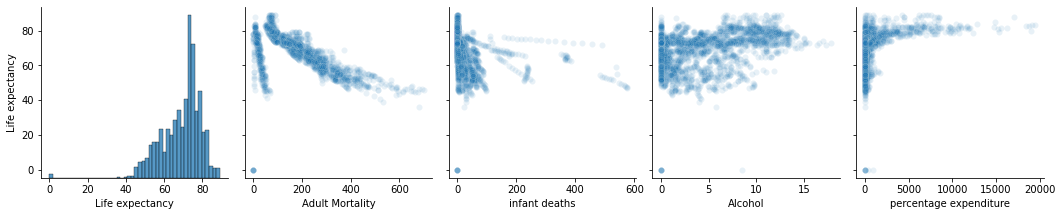

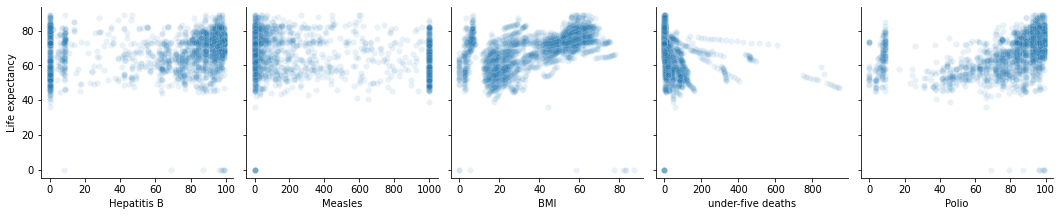

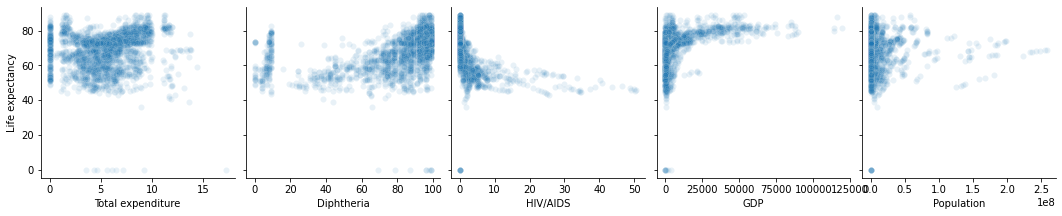

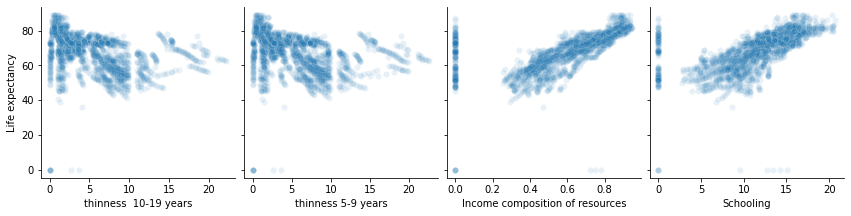

In [ ]:
sns.pairplot(df_train, height=3, y_vars = 'Life expectancy', x_vars = df_train.columns[0:5], kind='scatter', plot_kws={'alpha':0.1})
sns.pairplot(df_train, height=3, y_vars = 'Life expectancy', x_vars = df_train.columns[5:10], kind='scatter', plot_kws={'alpha':0.1})
sns.pairplot(df_train, height=3, y_vars = 'Life expectancy', x_vars = df_train.columns[10:15], kind='scatter', plot_kws={'alpha':0.1})
sns.pairplot(df_train, height=3, y_vars = 'Life expectancy', x_vars = df_train.columns[15:], kind='scatter', plot_kws={'alpha':0.1})

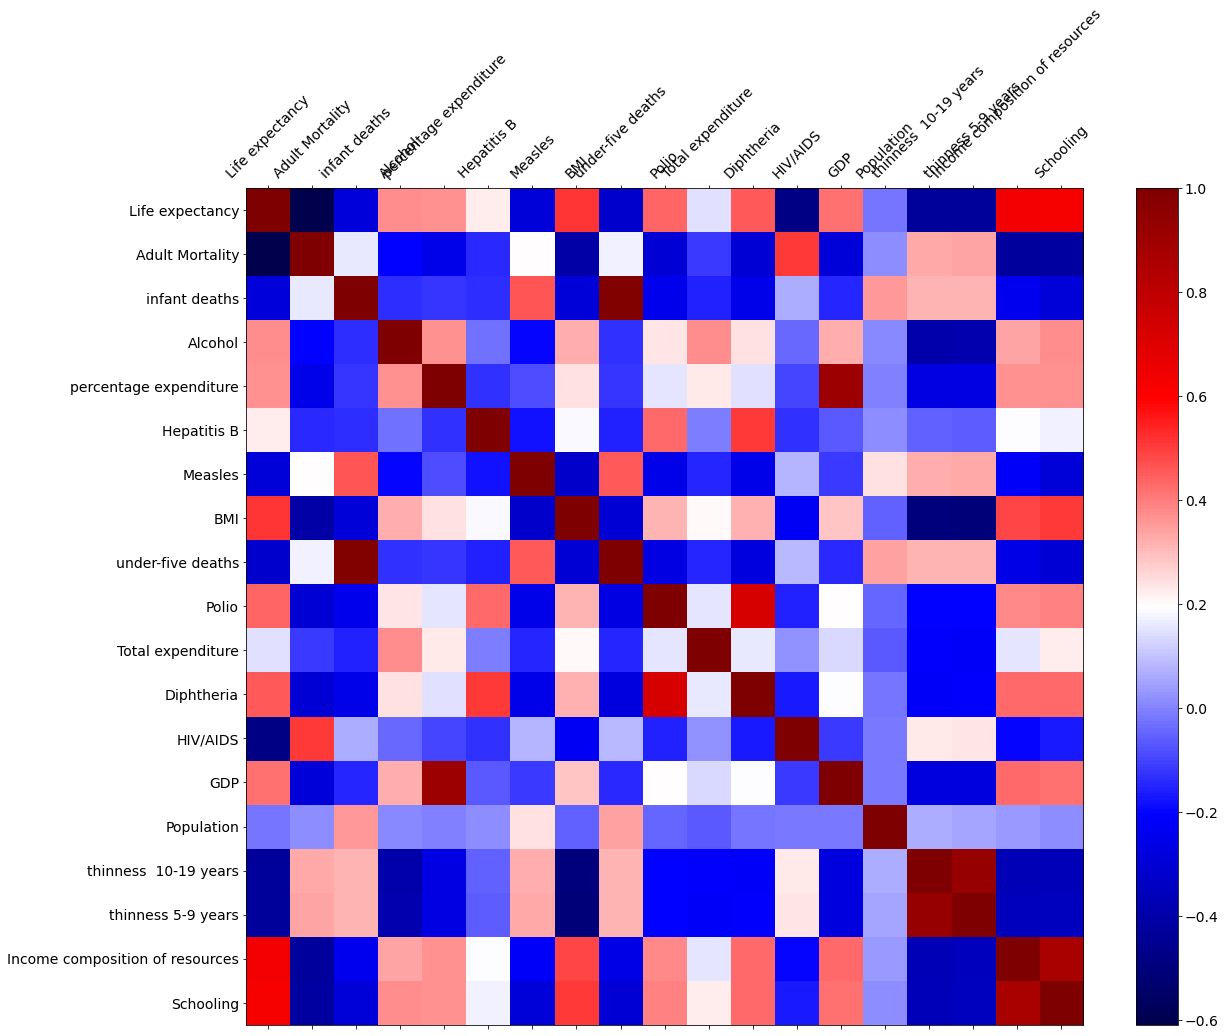

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_train.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

De las graficas anteriores vemos que unos buenos candidatos son:


*   Schooling
*   Income composition of resources
*   BMI
*   Diptheria


# 2.Modelo de regresión

In [ ]:
#Preprocesamiento de los datos
selected_cols = ['Schooling','Income composition of resources','BMI','Diphtheria']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]


In [ ]:
# Modelo
model = [('model', LinearRegression())]

In [ ]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [ ]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df_train.drop('Life expectancy', axis = 1)
y = df_train['Life expectancy']

pipeline = pipeline.fit(X,y)

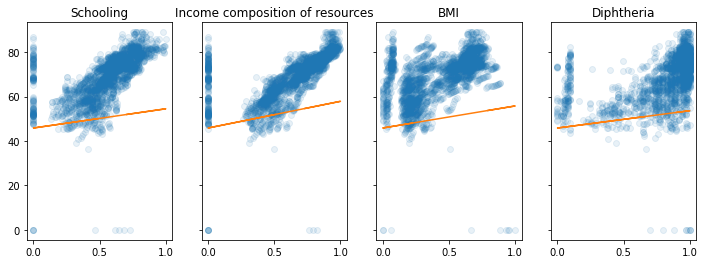

In [ ]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    #Modificaciones para el escalado
    X_temp = pipeline['initial'].transform(X)
    X_temp = pipeline['scaler'].transform(X_temp)

    # Variable x
    x = X_temp[:,i]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [ ]:
#Uso de la libreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(pipeline, filename) 
#Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Schooling',
                                                   'Income composition of '
                                                   'resources',
                                                   'BMI', 'Diphtheria'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [ ]:
#Coeficiente de determinacion
p2.score(X, y)

0.49314626364025405

In [ ]:
#RMSE
y_true = y
y_predicted = p2.predict(X)
np.sqrt(mse(y_true, y_predicted))

7.387316546187135

#3.Validación

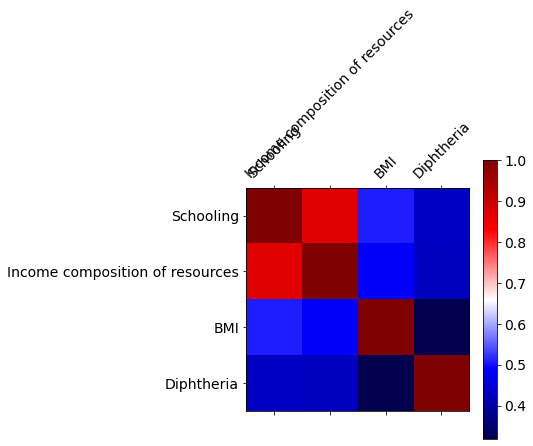

In [ ]:
df_temp = df_train[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [ ]:
selected_cols = ['Schooling','Income composition of resources','BMI','Diphtheria']

In [ ]:
for col in selected_cols:
       modelo =      [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
                      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', MinMaxScaler()),
                      ('model', LinearRegression())]

       pipe_temp = Pipeline(modelo)
       pipe_temp = pipe_temp.fit(X,y)

       print(f"{col}: {pipe_temp.score(X,y)}")

Schooling: 0.3862753780177852
Income composition of resources: 0.4005407713392658
BMI: 0.26279819454545894
Diphtheria: 0.20998570294844177


In [ ]:
def log_transform(X):
    
    X[:,0] = np.log(X[:,0])
    return X

transformer = FunctionTransformer(log_transform)

In [ ]:
#Posible conjunto de columnas para el modelo
selected_cols = ['Schooling','Income composition of resources','BMI','Diphtheria']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler()),
       #('transformer', transformer),
       ('model', LinearRegression())]

pipe_temp = Pipeline(pre)
pipe_temp = pipe_temp.fit(X,y)

pipe_temp.score(X,y)

0.49314626364025405

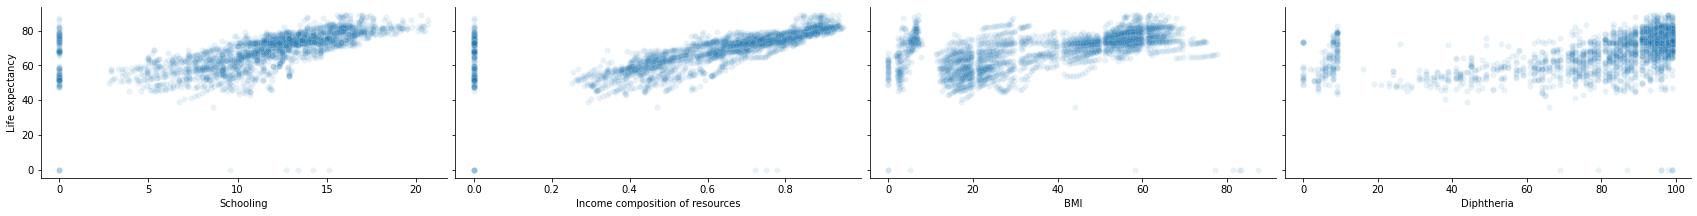

In [ ]:
sns.pairplot(df_train, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = ['Schooling','Income composition of resources','BMI','Diphtheria'], kind='scatter', plot_kws = {'alpha':0.1})

In [ ]:
# Creamos la variable
X = df_train[['Schooling']].copy()
X['Schooling_2'] = X['Schooling']**2

# columna
col = 'Schooling_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

Schooling_2: 0.4644897161533691


In [ ]:
# Creamos la variable
X = df_train[['Income composition of resources']].copy()
X['ICOR_2'] = X['Income composition of resources']**2

# columna
col = 'ICOR_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

ICOR_2: 0.5371615402101061


In [ ]:
# Creamos la variable
X = df_train[['BMI']].copy()
X['BMI_2'] = X['BMI']**2

# columna
col = 'BMI_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

BMI_2: 0.2643035322674592


In [ ]:
# Creamos la variable
X = df_train[['Diphtheria']].copy()
X['Diphtheria_2'] = X['Diphtheria']**2

# columna
col = 'Diphtheria_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

Diphtheria_2: 0.2769834549247978


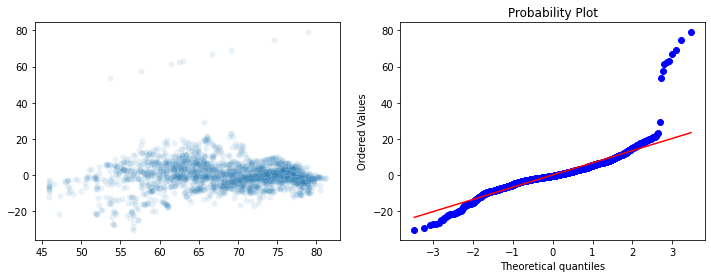

In [ ]:
X = df_train.drop('Life expectancy', axis = 1)
y = df_train['Life expectancy']

# Calculamos los errores
errors = (p2.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p2.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

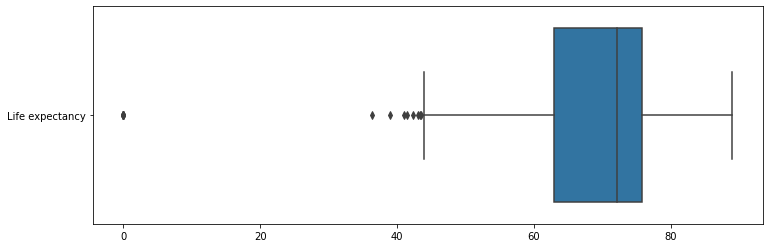

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_train[['Life expectancy']], orient="h")

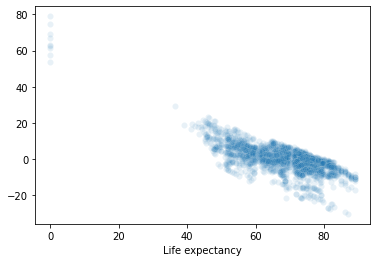

In [ ]:
# Visualizamos nuestros datos
errors = (p2.predict(X) - y).values
sns.scatterplot(data  = df_train, x = 'Life expectancy', y = errors, alpha = 0.1)

In [ ]:
df_clean = df_train.copy()
df_clean = df_clean[df_clean['Life expectancy'] <= df_clean['Life expectancy'].median() + 2*df_clean['Life expectancy'].std()]

X = df_clean.drop('Life expectancy', axis=1 )
y = df_clean['Life expectancy']

cols = ['Schooling','Income composition of resources','BMI','Diphtheria']

modelo =      [('initial',ColumnTransformer([("selector", 'passthrough',cols)])),
                      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', MinMaxScaler()),
                      #('transformer', transformer),
                      ('model', LinearRegression())]

p4 = Pipeline(modelo)
p4 = p4.fit(X,y)

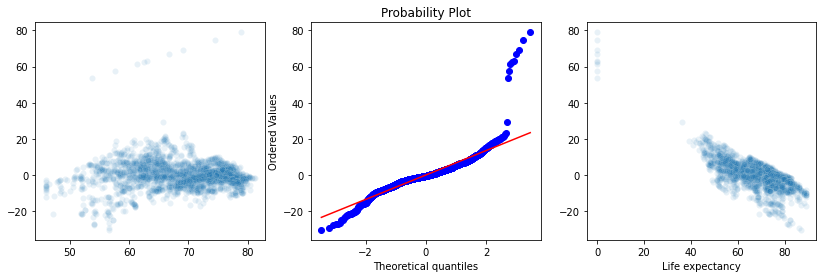

In [ ]:
# Revisamos las graficas

# Calculamos los errores
errors = (p4.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (14,4))

# Dispersión
sns.scatterplot(x = p4.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

sns.scatterplot(data  = df_clean, x = 'Life expectancy', y = errors, alpha = 0.1, ax = axes[2])

Se puede ver que en el modelo Theoretical quantiles los valores en el centro tienden a comportarse de una manera prevista con el modelo establecido para predecir los valores. Un problema se ve es en los extremos, sobre todo en aquellos que superan el valor de 2, esto quiere decri que aunque existan datos en ese rango de años, el saber y preveer porque se llega hasta esa edad hace que las variables establecidas no tengan mucha relación.

In [ ]:
df_clean = df_train.copy()
df_clean = df_clean[df_clean['Life expectancy'] <= df_clean['Life expectancy'].median() + 2*df_clean['Life expectancy'].std()]

X = df_clean.drop('Life expectancy', axis=1 )
y = df_clean['Life expectancy']

cols = ['Schooling','Income composition of resources','BMI','Diphtheria']

modelo =      [('initial',ColumnTransformer([("selector", 'passthrough',cols)])),
                      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', MinMaxScaler()),
                      ('polinomial_feature', PolynomialFeatures(1)),
                      #('transformer', transformer),
                      ('model', LinearRegression())]

p4 = Pipeline(modelo)
p4 = p4.fit(X,y)
coef = np.delete(p4['model'].coef_, 0)
coef

array([ 8.64967272, 12.01786264,  9.92561604,  7.79612537])

In [ ]:
# Resultado de los coeficientes
pd.DataFrame({'Columnas':cols, 'Coeficientes':coef})

,Columnas,Coeficientes
0,Schooling,8.649673
1,Income composition of resources,12.017863
2,BMI,9.925616
3,Diphtheria,7.796125


# 4.Exportar modelo

In [ ]:
#Uso de la libreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(p4, filename) 

['modelo.joblib']

In [ ]:
#Se lee
p = load(filename)
p

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Schooling',
                                                   'Income composition of '
                                                   'resources',
                                                   'BMI', 'Diphtheria'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('polinomial_feature', PolynomialFeatures(degree=1)),
                ('model', LinearRegression())])

In [ ]:
p4.score(X,y)

0.49314626364025405

In [ ]:
#RMSE
y_true = y
y_predicted = p2.predict(X)
np.sqrt(mse(y_true, y_predicted))

7.387316546187135

In [ ]:
#Predecir
p2.predict(df_recent)

array([69.2797402 , 68.68594038, 74.36685958, 74.48090396, 74.79309804,
       73.98272443, 73.52998736, 73.35290652, 73.18474811, 66.56026125,
       66.37942576, 66.28977689, 61.97656513, 72.09968779, 72.15647733,
       72.22570474, 71.90012012, 71.4006063 , 71.56019119, 70.95764282,
       64.29144137, 75.82734366, 69.60320065, 75.61507689, 75.34281559,
       75.23942132, 75.04460124, 74.97031576, 74.76281862, 74.51705106,
       74.38699513, 74.00450046, 73.58266705, 68.10006797, 73.04583063,
       72.92738344, 72.53090417, 76.78367683, 76.55058635, 76.51195623,
       76.24975696, 75.77369982, 75.05819146, 74.60349462, 68.31090409,
       74.16314618, 66.92713517, 66.74874681, 72.60841819, 71.0368383 ,
       71.43945518, 71.90545742, 71.25898653, 72.44196918, 72.19750915,
       71.97864245, 71.7328749 , 71.50002361, 62.90006674, 62.76732449,
       62.68773765, 62.72386243, 62.64427559, 58.51998364, 58.28289931,
       61.20523719, 62.2650956 , 61.96063209, 57.7877547 , 55.61

In [ ]:
#Clasificar los datos recientes
df_recent['Life expectancy'] = p4.predict(df_recent)

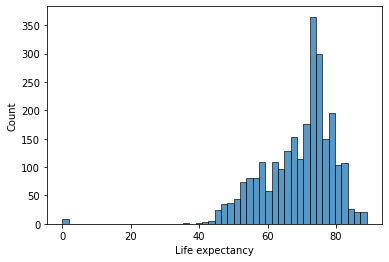

In [ ]:
#Datos antiguos
sns.histplot(df_train['Life expectancy'])

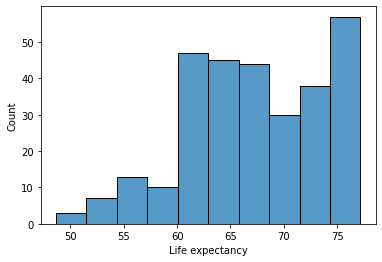

In [ ]:
#Datos nuevos
sns.histplot(df_recent['Life expectancy'])

En conclusion, podemos ver a partir de las dos graficas que a pesar de que hayan diferencias en ciertos valores, tambien encontramos varias similitudes. En ambas graficas podemos apreciar que su conteo maximo se da en el aproximado de expectativa de vida en los 75 años. De igual manera se ve una tendencia de menor cantidad a menor expectativa de vida. Aun así, se presentan ciertos casos donde han sido excluidos datos en los margenes a partir de los datos despues de 80 años y antes de los 50.

Este se pudo ver de antemano en la grafica Theoretical quantiles donde se vio que hay una gran desviación en los datos qeu estan en los extremos, en menor medida para los bajos, pero sobretodo para los valores que superan los 80 años. 

Se ve que en el modelo de predición hechos a partir del modelo de regresión lineal aunque si tiende a describir el comportamiento de lso datos exclusivamente en la media de los mismos, en los años de los margenes no tiende a predecir ningun dato.

Por las conclusiones dadas en ambos histogramas, en los supuestos explicados y en las variables seleccionadas, podemos decir que se logro un buen resultado y sera de gran uso este modelo como guia para el negocio.